In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import colors
import sklearn as sk
import datetime
import pycountry
import sys

# Merge AllMoviesClean & Imdb Data

In [2]:
imdb_df = pd.read_csv("IMDb movies.csv", delimiter=",")
imdb_df = imdb_df.rename(columns={'imdb_title_id':'imdb_id'})
imdb_df = imdb_df.drop(columns=['description','metascore','production_company','country','language','writer','director','actors','usa_gross_income'])
imdb_df

,imdb_id,title,original_title,year,date_published,genre,duration,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,6.1,537,$ 2250,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,5.9,171,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,5.2,420,$ 45000,NaN,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,7.0,2019,NaN,NaN,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,5.7,438,NaN,NaN,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,Jessie,Jessie,2019,2019-03-15,"Horror, Thriller",106,7.2,219,NaN,NaN,21.0,NaN
81269,tt9905412,Ottam,Ottam,2019,2019-03-08,Drama,120,7.8,510,INR 4000000,$ 4791,NaN,NaN
81270,tt9905462,Pengalila,Pengalila,2019,2019-03-08,Drama,111,8.4,604,INR 10000000,NaN,NaN,NaN
81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,8.4,369,NaN,NaN,NaN,NaN


In [3]:
df = pd.read_csv("AllMoviesDetailsCleaned.csv", delimiter=";")
df

C:\Users\pahn1\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
0,2,0,Drama|Crime,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,0.823904,Villealfa Filmproduction Oy,Finland,...,69.0,suomi,Released,NaN,Ariel,7.1,40,2,1,2
1,3,0,Drama|Comedy,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",0.47445,Villealfa Filmproduction Oy,Finland,...,76.0,English,Released,NaN,Shadows in Paradise,7.0,32,1,1,3
2,5,4000000,Crime|Comedy,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,...,98.0,English,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485,2,1,1
3,6,0,Action|Thriller|Crime,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,...,110.0,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69,3,2,1
4,8,42000,Documentary,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,...,80.0,English,Released,A Megacities remix.,Life in Loops (A Megacities RMX),6.4,4,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329039,469215,0,Documentary|History|TV Movie,tt5430190,en,The Day Hitler Died,The story of Hitler’s final hours told by peop...,0.0045,History Channel,United States of America,...,46.0,Deutsch,Released,"April 30th, 1945",The Day Hitler Died,7.0,1,1,1,2
329040,469216,0,NaN,NaN,de,Mobb Deep - Life of the Infamous: The Videos,NaN,0.00045,Sony Music Entertainmant,United States of America,...,NaN,English,Released,NaN,Mobb Deep - Life of the Infamous: The Videos,9.0,1,1,1,1
329041,469217,0,Drama|Comedy,NaN,en,#idiot,"In the modern day pursuit of fame and fortune,...",1.37217,none,Malaysia,...,11.0,English,Released,NaN,#idiot,0.0,0,0,1,1
329042,469218,0,Drama|Comedy,tt6391664,en,Conspiracy P.I.E,Director Levi A. Taylor invites you on a nosta...,0.0096,none,United States of America,...,12.0,English,Released,NaN,Conspiracy P.I.E,0.0,0,0,1,1


In [4]:
df = df[['imdb_id','popularity']]
df

,imdb_id,popularity
0,tt0094675,0.823904
1,tt0092149,0.47445
2,tt0113101,1.698
3,tt0107286,1.32287
4,tt0825671,0.054716
...,...,...
329039,tt5430190,0.0045
329040,NaN,0.00045
329041,NaN,1.37217
329042,tt6391664,0.0096


In [5]:
new_df = pd.merge(imdb_df,df,how='inner',on='imdb_id')
new_df

,imdb_id,title,original_title,year,date_published,genre,duration,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,popularity
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,6.1,537,$ 2250,NaN,7.0,7.0,0.000292
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,5.9,171,NaN,NaN,4.0,2.0,0.001362
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,5.2,420,$ 45000,NaN,24.0,3.0,0.000147
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,7.0,2019,NaN,NaN,28.0,14.0,0.246573
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,5.7,438,NaN,NaN,12.0,5.0,0.123239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73288,tt7154176,Net I Die,Net I Die,2017,2017-08-17,"Horror, Thriller",86,3.8,136,NaN,$ 21073,NaN,1.0,0.08
73289,tt7159382,Fidaa,Fidaa,2017,2017-07-21,"Drama, Romance",144,7.5,2796,INR 150000000,$ 67308,17.0,6.0,0.429813
73290,tt7160176,Namhansanseong,Namhansanseong,2017,2017-10-03,"Action, Drama, History",140,6.8,1271,NaN,$ 28645448,8.0,19.0,0.081302
73291,tt7162416,Milla,Milla,2017,2018-04-11,Drama,128,5.8,159,NaN,$ 3304,NaN,17.0,0.313259


In [6]:
new_df = new_df.drop(new_df[(new_df['budget'].isnull()) | (new_df['worlwide_gross_income'].isnull())].index)

In [7]:
new_df

,imdb_id,title,original_title,year,date_published,genre,duration,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,popularity
153,tt0010323,Das Cabinet des Dr. Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,8.1,51644,$ 18000,$ 8811,218.0,148.0,1.572642
193,tt0011440,Markens grøde,Markens grøde,1921,1921-12-02,Drama,107,6.6,184,NOK 250000,$ 4272,3.0,3.0,0.000324
226,tt0012190,The Four Horsemen of the Apocalypse,The Four Horsemen of the Apocalypse,1921,1923-01-08,"Drama, Romance, War",150,7.2,2935,$ 800000,$ 9183673,44.0,16.0,0.061277
232,tt0012349,The Kid,The Kid,1921,1921-02-06,"Comedy, Drama, Family",68,8.3,101619,$ 250000,$ 26916,151.0,97.0,1.301981
327,tt0014624,A Woman of Paris: A Drama of Fate,A Woman of Paris: A Drama of Fate,1923,1923-11-04,"Drama, Romance",82,7.0,4426,$ 351000,$ 11233,36.0,22.0,0.863643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73257,tt7054636,A Madea Family Funeral,A Madea Family Funeral,2019,2019-03-01,Comedy,109,4.3,2849,$ 20000000,$ 74747725,117.0,22.0,0.007004
73278,tt7128066,Charleston,Charleston,2017,2018,"Comedy, Drama",119,7.1,577,EUR 800000,$ 20270,3.0,16.0,0.78983
73280,tt7131622,Once Upon a Time... in Hollywood,Once Upon a Time... in Hollywood,2019,2019-08-14,"Comedy, Drama",161,8.0,228127,$ 90000000,$ 371207970,3049.0,522.0,0.285837
73281,tt7131870,Zhan lang II,Zhan lang II,2017,2017-07-27,"Action, Drama, Thriller",123,6.0,5973,$ 30100000,$ 870325439,77.0,39.0,1.249339


In [8]:
# mask = (new_df['budget_y'].astype(str).str.len() > 3) & (new_df['budget_x'].isnull())
# t= new_df.loc[mask]

# Plot graphs

In [16]:
movie_count = new_df['year'].value_counts()

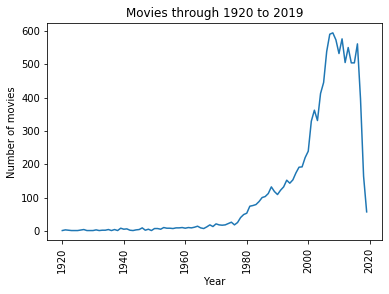

In [17]:
sns.lineplot(x=movie_count.index,y=movie_count)
plt.xlabel("Year")
plt.ylabel("Number of movies")
plt.title("Movies through 1920 to 2019")
plt.xticks(rotation='vertical')
plt.show()

# Drop movies before 1960s

`Second Golden Age of Holywood`

In [18]:
new_df = new_df.drop(new_df[new_df['year'] < 1960].index)
new_df.index = new_df.reset_index(drop=True)

,imdb_id,title,original_title,year,date_published,genre,duration,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,popularity
4060,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-04-05,"Comedy, Fantasy, Romance",118,6.4,75298,$ 48000000,$ 76019048,330.0,127.0,1.546302
9638,tt0053472,À bout de souffle,À bout de souffle,1960,1960-03-16,"Crime, Drama",90,7.9,66407,FRF 400000,$ 378503,196.0,192.0,2.040994
9658,tt0053604,The Apartment,The Apartment,1960,1960-09-16,"Comedy, Drama, Romance",125,8.3,148964,$ 3000000,$ 177066,308.0,229.0,2.361428
9839,tt0054098,Mughal-E-Azam,Mughal-E-Azam,1960,1960-08-05,"Drama, Romance, War",197,8.3,6484,INR 15000000,$ 161434,27.0,13.0,0.001237
9867,tt0054167,Peeping Tom,Peeping Tom,1960,1960-05-16,"Drama, Horror, Thriller",101,7.7,27880,GBP 135000,$ 24640,159.0,113.0,0.845545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73257,tt7054636,A Madea Family Funeral,A Madea Family Funeral,2019,2019-03-01,Comedy,109,4.3,2849,$ 20000000,$ 74747725,117.0,22.0,0.007004
73278,tt7128066,Charleston,Charleston,2017,2018,"Comedy, Drama",119,7.1,577,EUR 800000,$ 20270,3.0,16.0,0.78983
73280,tt7131622,Once Upon a Time... in Hollywood,Once Upon a Time... in Hollywood,2019,2019-08-14,"Comedy, Drama",161,8.0,228127,$ 90000000,$ 371207970,3049.0,522.0,0.285837
73281,tt7131870,Zhan lang II,Zhan lang II,2017,2017-07-27,"Action, Drama, Thriller",123,6.0,5973,$ 30100000,$ 870325439,77.0,39.0,1.249339


In [19]:
new_df

# Calculating revenue

In [20]:
new_df['worlwide_gross_income'] = new_df['worlwide_gross_income'].str.replace('$ ','',regex=False)
new_df['worlwide_gross_income'] = new_df['worlwide_gross_income'].apply(pd.to_numeric)
new_df['worlwide_gross_income'] = new_df['worlwide_gross_income'].astype(np.int64)
new_df = new_df.rename(columns={'worlwide_gross_income':'revenue'})

# Actor/actress/director and Genre

In [21]:
imdb_names = pd.read_csv("IMDb names.csv", delimiter=",")
imdb_names = imdb_names[['imdb_name_id','name']]
imdb_names

,imdb_name_id,name
0,nm0000001,Fred Astaire
1,nm0000002,Lauren Bacall
2,nm0000003,Brigitte Bardot
3,nm0000004,John Belushi
4,nm0000005,Ingmar Bergman
...,...,...
175710,nm9991131,Charoen Kaithitisuwan
175711,nm9991653,Wojciech Rzehak
175712,nm9992720,McMagic Cardenas
175713,nm9992840,Rashaduzzman Shohag


In [22]:
imdb_title = pd.read_csv("IMDb title_principals.csv",delimiter=",")
imdb_title

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"
1,tt0000574,2,nm0846894,actor,NaN,"[""School Master""]"
2,tt0000574,3,nm3002376,actor,NaN,"[""Steve Hart""]"
3,tt0000574,4,nm0170118,actress,NaN,NaN
4,tt0000574,5,nm0846879,director,NaN,NaN
...,...,...,...,...,...,...
377843,tt9903716,5,nm10532693,director,NaN,NaN
377844,tt9903716,6,nm10531260,producer,producer,NaN
377845,tt9903716,7,nm6044359,composer,NaN,NaN
377846,tt9903716,8,nm10532695,cinematographer,NaN,NaN


In [23]:
imdb_title = imdb_title[(imdb_title['category'] == 'actor') | (imdb_title['category'] == 'actress') | (imdb_title['category'] == 'director')]
imdb_title = imdb_title.drop(columns=['job','characters','ordering'])
imdb_title = imdb_title.rename(columns={'imdb_title_id':'imdb_id'})
imdb_title

,imdb_id,imdb_name_id,category
0,tt0000574,nm0846887,actress
1,tt0000574,nm0846894,actor
2,tt0000574,nm3002376,actor
3,tt0000574,nm0170118,actress
4,tt0000574,nm0846879,director
...,...,...,...
377839,tt9903716,nm10592896,actress
377840,tt9903716,nm7237124,actress
377841,tt9903716,nm5118890,actor
377842,tt9903716,nm10532694,actor


In [24]:
imdb = pd.merge(imdb_title,imdb_names,how='inner',on='imdb_name_id')
imdb

,imdb_id,imdb_name_id,category,name
0,tt0000574,nm0846887,actress,Elizabeth Tait
1,tt0000574,nm0846894,actor,John Tait
2,tt0000574,nm3002376,actor,Norman Campbell
3,tt0000574,nm0170118,actress,Bella Cola
4,tt0000574,nm0846879,director,Charles Tait
...,...,...,...,...
200670,tt9896916,nm9546685,director,Robert Fernandez
200671,tt9903716,nm10592896,actress,Sritha Chandana
200672,tt9903716,nm7237124,actress,Pavani Gangireddy
200673,tt9903716,nm10532694,actor,Vimal Krishna


In [25]:
imdb_title = imdb_title.astype(str).pivot_table(index="imdb_id",columns='category',values='imdb_name_id',aggfunc=','.join)
imdb_title.columns = ['actor','actress','director']
imdb_title['imdb_id'] = imdb_title.index
imdb_title = imdb_title.reset_index(drop=True)
imdb_title = imdb_title.replace(np.nan,0,regex=True)
imdb_title

,actor,actress,director,imdb_id
0,"nm0846894,nm3002376","nm0846887,nm0170118",nm0846879,tt0000574
1,"nm0660139,nm0685283,nm0209738,nm3942815",0,"nm0078205,nm0655824",tt0002130
2,"nm0312600,nm0911963,nm0306817,nm0443857",0,nm0130633,tt0002461
3,"nm0299761,nm0491498","nm0650120,nm0860895",nm0088881,tt0002646
4,"nm0622772,nm0107631,nm0577476",nm0137288,nm0275421,tt0003037
...,...,...,...,...
38777,"nm6451753,nm6956770,nm10520204,nm10520200,nm10...","nm5893186,nm10520202",nm3932585,tt9866700
38778,"nm10529307,nm10529308,nm10529309",nm10529306,"nm10529303,nm10529305,nm10529304",tt9894394
38779,"nm0861657,nm0722636,nm2061101",nm6717788,nm9546685,tt9896916
38780,"nm1758612,nm5226577,nm0693848",nm2544899,nm5971240,tt9899880


In [26]:
data = pd.merge(new_df,imdb_title,how='inner',on='imdb_id')
data

,imdb_id,title,original_title,year,date_published,genre,duration,avg_vote,votes,budget,revenue,reviews_from_users,reviews_from_critics,popularity,actor,actress,director
0,tt0054167,Peeping Tom,Peeping Tom,1960,1960-05-16,"Drama, Horror, Thriller",101,7.7,27880,GBP 135000,24640,159.0,113.0,0.845545,nm0003337,"nm0557281,nm0790452,nm0041602",nm0003836
1,tt0054331,Spartacus,Spartacus,1960,1962-02-09,"Adventure, Biography, Drama",197,7.9,115804,$ 12000000,1836351,293.0,123.0,2.362693,"nm0000018,nm0000059,nm0001452",nm0001739,nm0000040
2,tt0054357,Swiss Family Robinson,Swiss Family Robinson,1960,1961-06-30,"Adventure, Family",126,7.2,12597,$ 5000000,40356000,63.0,32.0,1.238644,"nm0590055,nm0531279","nm0570192,nm0613130",nm0002175
3,tt0054698,Breakfast at Tiffany's,Breakfast at Tiffany's,1961,1961-10-06,"Comedy, Drama, Romance",115,7.7,154456,$ 2500000,357750,419.0,181.0,4.320575,"nm0000577,nm0001171","nm0000030,nm0623658",nm0001175
4,tt0055597,Victim,Victim,1961,1961-10-11,Drama,90,7.7,4516,GBP 153756,25962,58.0,50.0,0.341439,"nm0001958,nm0696866,nm0629458",nm0843401,nm0213136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,tt6903084,Tea Pets,Tea Pets,2017,2017-07-21,"Animation, Adventure",98,5.7,131,$ 12000000,5057715,2.0,1.0,0.036284,nm4406213,nm4589246,nm7403142
5521,tt6995612,Gaston Lagaffe,Gaston Lagaffe,2018,2018-04-04,Comedy,85,4.3,604,$ 20000000,4348198,NaN,9.0,0.13949,"nm3676680,nm0553237,nm3143558,nm1569942",0,0
5522,tt7026672,Every Day,Every Day,2018,2018-04-20,"Drama, Fantasy, Romance",97,6.4,15065,$ 4900000,10421847,113.0,69.0,0.000105,nm6819854,"nm3886028,nm2913275,nm5037746",nm1302591
5523,tt7048622,L'insulte,L'insulte,2017,2017-09-14,"Crime, Drama, Thriller",113,7.7,12035,$ 3000000,3601603,55.0,128.0,1.22894,"nm2316384,nm3517807,nm5272930",nm3612526,nm0234780


In [27]:
actors = data['actor'].astype(str).str.split(',', expand = True)
actors.columns = ['actor{}'.format(i) for i in actors.columns]
actors['imdb_id'] = data['imdb_id']
actors = actors.reset_index(drop=True)
# actors = actors.dropna(axis='columns')
actors = actors.replace(np.nan,0,regex=True)
# actors = actors.rename(columns={0: 'actor'})
actors = actors.drop(columns=['actor3','actor4','actor5','actor6','actor7'])
actors

,actor0,actor1,actor2,imdb_id
0,nm0003337,0,0,tt0054167
1,nm0000018,nm0000059,nm0001452,tt0054331
2,nm0590055,nm0531279,0,tt0054357
3,nm0000577,nm0001171,0,tt0054698
4,nm0001958,nm0696866,nm0629458,tt0055597
...,...,...,...,...
5520,nm4406213,0,0,tt6903084
5521,nm3676680,nm0553237,nm3143558,tt6995612
5522,nm6819854,0,0,tt7026672
5523,nm2316384,nm3517807,nm5272930,tt7048622


In [28]:
actress = data['actress'].astype(str).str.split(',', expand = True)
actress.columns = ['actress{}'.format(i) for i in actress.columns]
actress['imdb_id'] = data['imdb_id']
actress = actress.reset_index(drop=True)
# actress = actress.dropna(axis='columns')
actress = actress.replace(np.nan,0,regex=True)
# actress = actress.rename(columns={0: 'actress'})
actress = actress.drop(columns=['actress3','actress4','actress5','actress6'])
actress

,actress0,actress1,actress2,imdb_id
0,nm0557281,nm0790452,nm0041602,tt0054167
1,nm0001739,0,0,tt0054331
2,nm0570192,nm0613130,0,tt0054357
3,nm0000030,nm0623658,0,tt0054698
4,nm0843401,0,0,tt0055597
...,...,...,...,...
5520,nm4589246,0,0,tt6903084
5521,0,0,0,tt6995612
5522,nm3886028,nm2913275,nm5037746,tt7026672
5523,nm3612526,0,0,tt7048622


In [29]:
director = data['director'].astype(str).str.split(',', expand = True)
# director.columns = ['director{}'.format(i) for i in director.columns]
director['imdb_id'] = data['imdb_id']
director = director.reset_index(drop=True)
director = director.dropna(axis='columns')
director = director.replace(np.nan,0,regex=True)
director = director.rename(columns={0: 'director'})
director

,director,imdb_id
0,nm0003836,tt0054167
1,nm0000040,tt0054331
2,nm0002175,tt0054357
3,nm0001175,tt0054698
4,nm0213136,tt0055597
...,...,...
5520,nm7403142,tt6903084
5521,0,tt6995612
5522,nm1302591,tt7026672
5523,nm0234780,tt7048622


In [30]:
genre = data['genre'].astype(str).str.split(',', expand = True)
genre.columns = ['genre{}'.format(i) for i in genre.columns]
genre = genre.reset_index(drop=True)
genre['imdb_id'] = data['imdb_id']
genre = genre.replace(np.nan,0,regex=True)
genre

,genre0,genre1,genre2,imdb_id
0,Drama,Horror,Thriller,tt0054167
1,Adventure,Biography,Drama,tt0054331
2,Adventure,Family,0,tt0054357
3,Comedy,Drama,Romance,tt0054698
4,Drama,0,0,tt0055597
...,...,...,...,...
5520,Animation,Adventure,0,tt6903084
5521,Comedy,0,0,tt6995612
5522,Drama,Fantasy,Romance,tt7026672
5523,Crime,Drama,Thriller,tt7048622


In [31]:
data = data.drop(columns=['actor','actress','director','genre'])
cast = pd.merge(actors,actress,on='imdb_id',how='inner').merge(director,on='imdb_id',how='inner').merge(genre,on='imdb_id',how='inner')
final_df = pd.merge(data,cast,on='imdb_id',how='inner')
final_df

,imdb_id,title,original_title,year,date_published,duration,avg_vote,votes,budget,revenue,...,actor0,actor1,actor2,actress0,actress1,actress2,director,genre0,genre1,genre2
0,tt0054167,Peeping Tom,Peeping Tom,1960,1960-05-16,101,7.7,27880,GBP 135000,24640,...,nm0003337,0,0,nm0557281,nm0790452,nm0041602,nm0003836,Drama,Horror,Thriller
1,tt0054331,Spartacus,Spartacus,1960,1962-02-09,197,7.9,115804,$ 12000000,1836351,...,nm0000018,nm0000059,nm0001452,nm0001739,0,0,nm0000040,Adventure,Biography,Drama
2,tt0054357,Swiss Family Robinson,Swiss Family Robinson,1960,1961-06-30,126,7.2,12597,$ 5000000,40356000,...,nm0590055,nm0531279,0,nm0570192,nm0613130,0,nm0002175,Adventure,Family,0
3,tt0054698,Breakfast at Tiffany's,Breakfast at Tiffany's,1961,1961-10-06,115,7.7,154456,$ 2500000,357750,...,nm0000577,nm0001171,0,nm0000030,nm0623658,0,nm0001175,Comedy,Drama,Romance
4,tt0055597,Victim,Victim,1961,1961-10-11,90,7.7,4516,GBP 153756,25962,...,nm0001958,nm0696866,nm0629458,nm0843401,0,0,nm0213136,Drama,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,tt6903084,Tea Pets,Tea Pets,2017,2017-07-21,98,5.7,131,$ 12000000,5057715,...,nm4406213,0,0,nm4589246,0,0,nm7403142,Animation,Adventure,0
5521,tt6995612,Gaston Lagaffe,Gaston Lagaffe,2018,2018-04-04,85,4.3,604,$ 20000000,4348198,...,nm3676680,nm0553237,nm3143558,0,0,0,0,Comedy,0,0
5522,tt7026672,Every Day,Every Day,2018,2018-04-20,97,6.4,15065,$ 4900000,10421847,...,nm6819854,0,0,nm3886028,nm2913275,nm5037746,nm1302591,Drama,Fantasy,Romance
5523,tt7048622,L'insulte,L'insulte,2017,2017-09-14,113,7.7,12035,$ 3000000,3601603,...,nm2316384,nm3517807,nm5272930,nm3612526,0,0,nm0234780,Crime,Drama,Thriller


In [32]:
final_df['Month'] = pd.DatetimeIndex(final_df['date_published']).month
final_df['Day'] = pd.DatetimeIndex(final_df['date_published']).day
final_df

,imdb_id,title,original_title,year,date_published,duration,avg_vote,votes,budget,revenue,...,actor2,actress0,actress1,actress2,director,genre0,genre1,genre2,Month,Day
0,tt0054167,Peeping Tom,Peeping Tom,1960,1960-05-16,101,7.7,27880,GBP 135000,24640,...,0,nm0557281,nm0790452,nm0041602,nm0003836,Drama,Horror,Thriller,5,16
1,tt0054331,Spartacus,Spartacus,1960,1962-02-09,197,7.9,115804,$ 12000000,1836351,...,nm0001452,nm0001739,0,0,nm0000040,Adventure,Biography,Drama,2,9
2,tt0054357,Swiss Family Robinson,Swiss Family Robinson,1960,1961-06-30,126,7.2,12597,$ 5000000,40356000,...,0,nm0570192,nm0613130,0,nm0002175,Adventure,Family,0,6,30
3,tt0054698,Breakfast at Tiffany's,Breakfast at Tiffany's,1961,1961-10-06,115,7.7,154456,$ 2500000,357750,...,0,nm0000030,nm0623658,0,nm0001175,Comedy,Drama,Romance,10,6
4,tt0055597,Victim,Victim,1961,1961-10-11,90,7.7,4516,GBP 153756,25962,...,nm0629458,nm0843401,0,0,nm0213136,Drama,0,0,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,tt6903084,Tea Pets,Tea Pets,2017,2017-07-21,98,5.7,131,$ 12000000,5057715,...,0,nm4589246,0,0,nm7403142,Animation,Adventure,0,7,21
5521,tt6995612,Gaston Lagaffe,Gaston Lagaffe,2018,2018-04-04,85,4.3,604,$ 20000000,4348198,...,nm3143558,0,0,0,0,Comedy,0,0,4,4
5522,tt7026672,Every Day,Every Day,2018,2018-04-20,97,6.4,15065,$ 4900000,10421847,...,0,nm3886028,nm2913275,nm5037746,nm1302591,Drama,Fantasy,Romance,4,20
5523,tt7048622,L'insulte,L'insulte,2017,2017-09-14,113,7.7,12035,$ 3000000,3601603,...,nm5272930,nm3612526,0,0,nm0234780,Crime,Drama,Thriller,9,14


# Converting currency

In [33]:
budget_df = final_df.loc[:, ('imdb_id', 'budget','year')]
budget_df['currency_amount'] = budget_df['budget'].str.extract(' (\d+)')
budget_df['currency_code'] = budget_df['budget'].str.replace(' \d+', '')
budget_df = budget_df.drop(columns='budget')
budget_df

,imdb_id,year,currency_amount,currency_code
0,tt0054167,1960,135000,GBP
1,tt0054331,1960,12000000,$
2,tt0054357,1960,5000000,$
3,tt0054698,1961,2500000,$
4,tt0055597,1961,153756,GBP
...,...,...,...,...
5520,tt6903084,2017,12000000,$
5521,tt6995612,2018,20000000,$
5522,tt7026672,2018,4900000,$
5523,tt7048622,2017,3000000,$


In [34]:
currency = pd.read_csv("currency.csv", delimiter=",")
currency = currency.drop(columns=['Unnamed: 0','MEASURE'])
currency = currency.drop(currency[currency['TIME'] < 1960].index)
currency.reset_index(drop=True, inplace=True)
currency

,LOCATION,TIME,Value
0,AUS,1960,0.892857
1,AUS,1961,0.892857
2,AUS,1962,0.892857
3,AUS,1963,0.892857
4,AUS,1964,0.892857
...,...,...,...
2809,ROU,2013,3.327917
2810,ROU,2014,3.349175
2811,ROU,2015,4.005667
2812,ROU,2016,4.059183


In [35]:
country_code = pd.read_csv("country_codes.csv", delimiter=",")
country_code = country_code.loc[:, ('ISO3166-1-Alpha-3', 'ISO4217-currency_alphabetic_code')]
country_code = country_code.rename(columns={'ISO3166-1-Alpha-3':'LOCATION','ISO4217-currency_alphabetic_code':'currency_code'})
country_code['currency_code'] = country_code['currency_code'].str.replace('USD','$')
country_code

,LOCATION,currency_code
0,TWN,NaN
1,AFG,AFN
2,ALB,ALL
3,DZA,DZD
4,ASM,$
...,...,...
245,ESH,MAD
246,YEM,YER
247,ZMB,ZMW
248,ZWE,ZWL


In [36]:
currency_df = pd.merge(currency,country_code,on='LOCATION',how='inner')
currency_df

,LOCATION,TIME,Value,currency_code
0,AUS,1960,0.892857,AUD
1,AUS,1961,0.892857,AUD
2,AUS,1962,0.892857,AUD
3,AUS,1963,0.892857,AUD
4,AUS,1964,0.892857,AUD
...,...,...,...,...
2727,ROU,2013,3.327917,RON
2728,ROU,2014,3.349175,RON
2729,ROU,2015,4.005667,RON
2730,ROU,2016,4.059183,RON


In [37]:
euro = currency_df[currency_df['currency_code']=='EUR']
euro = euro.groupby('TIME')['Value'].agg([np.mean,np.median,lambda x: x.mad(),lambda y: stats.median_absolute_deviation(y),np.std])
euro['TIME'] = euro.index
euro = euro.rename(columns={'<lambda_0>':'Mean Absolute Deviation','<lambda_1>':'Median Absolute Deviation','std':'Standard Deviation'})
euro.reset_index(drop=True, inplace=True)
euro

,mean,median,Mean Absolute Deviation,Median Absolute Deviation,Standard Deviation,TIME
0,0.881500,0.681432,5.475316e-01,0.665094,0.664337,1960
1,0.870589,0.681432,5.334280e-01,0.664705,0.645495,1961
2,0.868399,0.681432,5.306126e-01,0.664705,0.641814,1962
3,0.868399,0.681432,5.306126e-01,0.664705,0.641814,1963
4,0.868399,0.681432,5.306126e-01,0.664705,0.641814,1964
5,0.868399,0.681432,5.306126e-01,0.664705,0.641814,1965
6,0.868399,0.681432,5.306126e-01,0.664705,0.641814,1966
7,0.873998,0.685670,5.266130e-01,0.670988,0.639008,1967
8,0.907272,0.732284,5.118892e-01,0.679536,0.626565,1968
9,0.908002,0.751884,5.071240e-01,0.679536,0.621901,1969


In [38]:
euro = euro.loc[:,('median','TIME')]
euro = euro.rename(columns={'median':'Value'})
euro['currency_code'] = 'EUR'
euro

,Value,TIME,currency_code
0,0.681432,1960,EUR
1,0.681432,1961,EUR
2,0.681432,1962,EUR
3,0.681432,1963,EUR
4,0.681432,1964,EUR
5,0.681432,1965,EUR
6,0.681432,1966,EUR
7,0.685670,1967,EUR
8,0.732284,1968,EUR
9,0.751884,1969,EUR


In [39]:
currency_df = currency_df.drop(currency_df[currency_df['currency_code']=='EUR'].index)
currency_df = currency_df.drop(columns='LOCATION')
currency_df = currency_df.append(euro)
currency_df

,TIME,Value,currency_code
0,1960,0.892857,AUD
1,1961,0.892857,AUD
2,1962,0.892857,AUD
3,1963,0.892857,AUD
4,1964,0.892857,AUD
...,...,...,...
53,2013,0.753159,EUR
54,2014,0.753731,EUR
55,2015,0.901659,EUR
56,2016,0.904035,EUR


In [40]:
budget_df = pd.merge(currency_df,budget_df,how='inner',left_on=['TIME','currency_code'],right_on=['year','currency_code'])
budget_df

,TIME,Value,currency_code,imdb_id,year,currency_amount
0,1971,0.882670,AUD,tt0067541,1971,800000
1,1975,0.763871,AUD,tt0073540,1975,440000
2,1981,0.870215,AUD,tt0082432,1981,2600000
3,1984,1.139519,AUD,tt0087981,1984,5500000
4,1989,1.264597,AUD,tt0094764,1989,10000000
...,...,...,...,...,...,...
5264,2017,0.887397,EUR,tt6155922,2017,500
5265,2017,0.887397,EUR,tt6164502,2017,1450000
5266,2017,0.887397,EUR,tt6417014,2017,385000
5267,2017,0.887397,EUR,tt6445396,2017,7800000


In [41]:
budget_df['currency_amount'] = budget_df['currency_amount'].astype(float)
budget_df['budget'] = budget_df['Value']* budget_df['currency_amount']
budget_df

,TIME,Value,currency_code,imdb_id,year,currency_amount,budget
0,1971,0.882670,AUD,tt0067541,1971,800000.0,7.061360e+05
1,1975,0.763871,AUD,tt0073540,1975,440000.0,3.361032e+05
2,1981,0.870215,AUD,tt0082432,1981,2600000.0,2.262559e+06
3,1984,1.139519,AUD,tt0087981,1984,5500000.0,6.267354e+06
4,1989,1.264597,AUD,tt0094764,1989,10000000.0,1.264597e+07
...,...,...,...,...,...,...,...
5264,2017,0.887397,EUR,tt6155922,2017,500.0,4.436985e+02
5265,2017,0.887397,EUR,tt6164502,2017,1450000.0,1.286726e+06
5266,2017,0.887397,EUR,tt6417014,2017,385000.0,3.416478e+05
5267,2017,0.887397,EUR,tt6445396,2017,7800000.0,6.921697e+06


In [42]:
budget_df.to_csv('budget_df.csv',index=False)

In [43]:
budget_df = budget_df.loc[:,('imdb_id','budget')]

In [44]:
final_df = final_df.drop(columns='budget')
final_df = pd.merge(final_df,budget_df,on='imdb_id',how='inner')

In [45]:
final_df['profit'] = final_df['revenue'] - final_df['budget']
final_df['ROI'] = (final_df['profit']/ final_df['budget'])*100

In [46]:
final_df = pd.concat([final_df.loc[:,'imdb_id':'original_title'],final_df.loc[:,'duration':'votes'],final_df.loc[:,('Day','Month','year','date_published')],final_df.loc[:,'reviews_from_users':'popularity'],final_df.loc[:,('budget','revenue','profit','ROI')],final_df.loc[:,'actor0':'genre2']], axis=1, sort=False)

In [47]:
final_df

,imdb_id,title,original_title,duration,avg_vote,votes,Day,Month,year,date_published,...,actor0,actor1,actor2,actress0,actress1,actress2,director,genre0,genre1,genre2
0,tt0054167,Peeping Tom,Peeping Tom,101,7.7,27880,16,5,1960,1960-05-16,...,nm0003337,0,0,nm0557281,nm0790452,nm0041602,nm0003836,Drama,Horror,Thriller
1,tt0054331,Spartacus,Spartacus,197,7.9,115804,9,2,1960,1962-02-09,...,nm0000018,nm0000059,nm0001452,nm0001739,0,0,nm0000040,Adventure,Biography,Drama
2,tt0054357,Swiss Family Robinson,Swiss Family Robinson,126,7.2,12597,30,6,1960,1961-06-30,...,nm0590055,nm0531279,0,nm0570192,nm0613130,0,nm0002175,Adventure,Family,0
3,tt0054698,Breakfast at Tiffany's,Breakfast at Tiffany's,115,7.7,154456,6,10,1961,1961-10-06,...,nm0000577,nm0001171,0,nm0000030,nm0623658,0,nm0001175,Comedy,Drama,Romance
4,tt0055597,Victim,Victim,90,7.7,4516,11,10,1961,1961-10-11,...,nm0001958,nm0696866,nm0629458,nm0843401,0,0,nm0213136,Drama,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5264,tt6817202,Imgeumnimui sagunsoocheob,Imgeumnimui sagunsoocheob,114,6.4,212,26,4,2017,2017-04-26,...,nm1310525,nm1693068,nm3641180,0,0,0,nm8945443,Comedy,Mystery,0
5265,tt6878378,Vivegam,Vivegam,149,5.7,10188,24,8,2017,2017-08-24,...,nm0015001,nm1059103,0,nm2570245,nm7432227,0,nm2350892,Action,Thriller,0
5266,tt6892250,Absurd Accident,Absurd Accident,97,6.1,111,19,5,2016,2017-05-19,...,nm8994804,0,0,nm8524411,nm8994805,0,nm8994803,Comedy,Thriller,0
5267,tt6903084,Tea Pets,Tea Pets,98,5.7,131,21,7,2017,2017-07-21,...,nm4406213,0,0,nm4589246,0,0,nm7403142,Animation,Adventure,0


# Merge rating

In [48]:
imdb_rating = pd.read_csv("IMDb ratings.csv", delimiter=",")
imdb_rating = imdb_rating.drop(columns=['allgenders_0age_avg_vote','allgenders_0age_votes','males_0age_avg_vote','males_0age_votes','females_0age_avg_vote','females_0age_votes','votes_10','votes_9','votes_8','votes_7','votes_6','votes_5','votes_4','votes_3','votes_2','votes_1'])
imdb_rating = imdb_rating.rename(columns={'imdb_title_id':'imdb_id'})
imdb_rating

,imdb_id,weighted_average_vote,total_votes,mean_vote,median_vote,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000574,6.1,537,6.3,6.0,6.2,126.0,5.9,209.0,6.4,...,6.0,19.0,6.6,14.0,6.3,64.0,6.0,89.0,6.2,309.0
1,tt0001892,5.9,171,6.1,6.0,5.7,25.0,6.0,60.0,6.3,...,5.8,4.0,6.5,8.0,5.9,29.0,6.2,27.0,6.0,114.0
2,tt0002101,5.2,420,5.2,5.0,4.6,24.0,5.1,104.0,5.3,...,5.5,14.0,6.2,20.0,4.9,57.0,5.5,197.0,4.7,103.0
3,tt0002130,7.0,2019,6.9,7.0,7.0,429.0,7.0,783.0,7.1,...,7.3,74.0,7.4,75.0,7.0,126.0,7.1,452.0,7.0,1076.0
4,tt0002199,5.7,438,5.8,6.0,5.7,38.0,5.6,156.0,5.9,...,4.8,10.0,6.5,15.0,5.7,56.0,5.9,161.0,5.7,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,7.2,219,8.1,9.0,7.0,43.0,7.0,34.0,4.6,...,5.6,6.0,6.7,3.0,2.0,4.0,5.0,14.0,7.1,45.0
81269,tt9905412,7.8,510,7.8,9.0,1.0,2.0,5.5,2.0,10.0,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,3.0
81270,tt9905462,8.4,604,8.1,9.0,5.5,2.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,4.0,3.0
81271,tt9911774,8.4,369,8.2,9.0,1.0,1.0,10.0,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0


In [49]:
final_df = pd.merge(final_df,imdb_rating,how='inner',on='imdb_id')

In [50]:
final_df

,imdb_id,title,original_title,duration,avg_vote,votes,Day,Month,year,date_published,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0054167,Peeping Tom,Peeping Tom,101,7.7,27880,16,5,1960,1960-05-16,...,7.5,1502.0,7.6,602.0,7.4,469.0,7.7,6529.0,7.6,14265.0
1,tt0054331,Spartacus,Spartacus,197,7.9,115804,9,2,1960,1962-02-09,...,7.7,4255.0,7.9,2760.0,8.0,703.0,8.0,25812.0,7.9,56853.0
2,tt0054357,Swiss Family Robinson,Swiss Family Robinson,126,7.2,12597,30,6,1960,1961-06-30,...,7.5,1099.0,7.4,489.0,6.6,312.0,7.4,5578.0,6.8,3206.0
3,tt0054698,Breakfast at Tiffany's,Breakfast at Tiffany's,115,7.7,154456,6,10,1961,1961-10-06,...,7.9,22081.0,7.9,4783.0,7.5,663.0,7.6,30260.0,7.6,72504.0
4,tt0055597,Victim,Victim,90,7.7,4516,11,10,1961,1961-10-11,...,7.5,204.0,7.9,274.0,7.0,224.0,7.8,1253.0,7.6,2235.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5264,tt6817202,Imgeumnimui sagunsoocheob,Imgeumnimui sagunsoocheob,114,6.4,212,26,4,2017,2017-04-26,...,6.6,22.0,6.8,4.0,5.8,6.0,6.7,26.0,6.4,97.0
5265,tt6878378,Vivegam,Vivegam,149,5.7,10188,24,8,2017,2017-08-24,...,4.7,46.0,3.4,7.0,3.1,22.0,6.5,1506.0,5.2,2269.0
5266,tt6892250,Absurd Accident,Absurd Accident,97,6.1,111,19,5,2016,2017-05-19,...,6.8,4.0,6.0,1.0,6.0,7.0,7.0,9.0,5.8,65.0
5267,tt6903084,Tea Pets,Tea Pets,98,5.7,131,21,7,2017,2017-07-21,...,5.9,11.0,3.0,1.0,4.4,7.0,5.3,3.0,5.4,68.0


In [51]:
# data_category = pd.crosstab(data['imdb_title_id'], data['category'])

In [52]:
final_df.to_csv('movies.csv',index=False)

# Statistic

# Plot graphs again :(